In [19]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [20]:
(X_train,y_train) , (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [21]:
X_test.shape

(10000, 32, 32, 3)

In [22]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

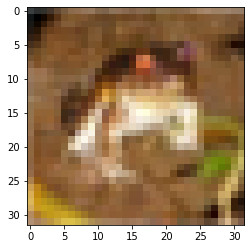

In [23]:
plt.imshow(X_train[0])

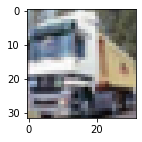

In [24]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [25]:
y_train.shape

(50000, 1)

In [26]:
y_train[:5] #6 if , 9 is ship this is 2d array which we dont need

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [27]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [28]:
classes = ["airplane","automoboile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [29]:
classes[0]

'airplane'

In [30]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

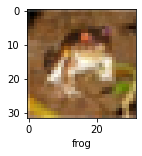

In [31]:
plot_sample(X_train,y_train,0)

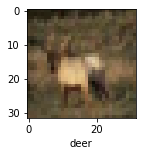

In [32]:
plot_sample(X_train,y_train,3)

In [33]:
X_train=X_train/255
X_test=X_test/255

In [34]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])

ann.compile(optimizer = 'SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.8132 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.6245 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5406 - accuracy: 0.4571
Epoch 4/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4800 - accuracy: 0.4787
Epoch 5/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4328 - accuracy: 0.4980


In [35]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.5430 - accuracy: 0.4470


[1.5430002212524414, 0.44699999690055847]

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.37      0.48      1000
           1       0.62      0.61      0.62      1000
           2       0.45      0.20      0.28      1000
           3       0.26      0.58      0.36      1000
           4       0.50      0.28      0.36      1000
           5       0.35      0.33      0.34      1000
           6       0.41      0.65      0.50      1000
           7       0.73      0.33      0.45      1000
           8       0.45      0.77      0.57      1000
           9       0.66      0.34      0.45      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.44     10000
weighted avg       0.51      0.45      0.44     10000



In [37]:
#using CNN

In [40]:
cnn=models.Sequential([
    
    #here will be some cnn layers
    #dense
    #when we're in the middle layer we dont have to specify shape
    
    
    #feature extraction
    layers.Conv2D(filters=32,activation = 'relu', kernel_size=(3,3) , input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    
    #classification
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

In [41]:
#softmax explained
#1: (0.45)
#2: (0.67)
    
#1: (0.45)/(0.45+0.67)    
        

In [42]:
cnn.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [43]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.6354 - accuracy: 0.3986
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3440 - accuracy: 0.5149
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2480 - accuracy: 0.5525
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1760 - accuracy: 0.5777
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1307 - accuracy: 0.5941
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0919 - accuracy: 0.6082
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0592 - accuracy: 0.6199
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0266 - accuracy: 0.6300
Epoch 9/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0044 - accuracy: 0.6396
Epoch 10/10
1563/1563 [==============================] - 26s 17m

In [44]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.1129 - accuracy: 0.6135


[1.1129218339920044, 0.6134999990463257]

In [45]:
y_test[:5]#it is a 2d array convert it to 1d

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [47]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

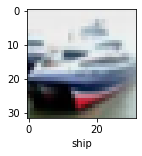

In [49]:
plot_sample(X_test,y_test,1)

In [50]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[7.46643450e-03, 6.85626233e-04, 4.71642381e-03, 4.62582201e-01,
        1.00150576e-03, 5.55399396e-02, 1.38659105e-01, 1.03082304e-04,
        3.25490952e-01, 3.75480321e-03],
       [6.45896420e-02, 9.10545588e-02, 2.27544133e-05, 8.27643962e-05,
        1.23614536e-05, 3.17941044e-06, 2.66967800e-06, 1.17786655e-07,
        8.43665242e-01, 5.66755829e-04],
       [5.21702528e-01, 7.73688704e-02, 6.48896629e-03, 2.83782161e-03,
        3.19428090e-03, 4.04807070e-04, 1.09030036e-04, 2.82818044e-04,
        3.73805970e-01, 1.38048884e-02],
       [5.88879406e-01, 2.71239039e-02, 1.28421178e-02, 3.40720871e-03,
        1.96991879e-02, 2.84139678e-04, 1.12587528e-03, 1.01314465e-04,
        3.45447987e-01, 1.08871807e-03],
       [4.43711272e-03, 2.84851855e-03, 4.35917303e-02, 8.03738907e-02,
        4.42225575e-01, 3.12175155e-02, 3.88777733e-01, 5.85278450e-03,
        1.85371042e-04, 4.89756581e-04]], dtype=float32)

In [51]:
#values arev between 0 and 1 and we shud find which value is max

In [53]:
np.argmax([5,12,1,2])#12 is the max element and its index is 1 therefore output is 1

1

In [54]:
np.argmax(y_pred[0])

3

In [55]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [56]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

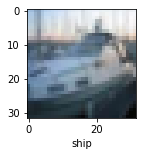

In [57]:
plot_sample(X_test,y_test,2)

In [58]:
classes

['airplane',
 'automoboile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [59]:
classes[y_classes[2]]

'airplane'

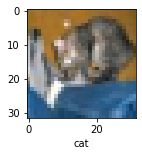

In [60]:
plot_sample(X_test,y_test,0)

In [61]:
classes[y_classes[0]]

'cat'

In [63]:
print("Classification Report \n", classification_report(y_test,y_classes))

Classification Report 
               precision    recall  f1-score   support

           0       0.62      0.67      0.64      1000
           1       0.67      0.82      0.74      1000
           2       0.56      0.32      0.40      1000
           3       0.42      0.45      0.44      1000
           4       0.49      0.59      0.54      1000
           5       0.56      0.49      0.53      1000
           6       0.68      0.75      0.71      1000
           7       0.74      0.66      0.70      1000
           8       0.65      0.81      0.72      1000
           9       0.76      0.57      0.65      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.61      0.61     10000

